In [84]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import datetime as dt
import pandas as pd
import numpy as np

In [85]:
# Enable the cache
fastf1.Cache.enable_cache('cache')

In [86]:
# Load the session data
session = fastf1.get_testing_session(2022, 2, 3)

In [87]:
# Collect all race laps
laps = session.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Pre-Season Test - Practice 3 [v2.2.0-alpha0]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 3
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
core        WARNING 	Failed to load weather data!
core           INFO 	Loaded data for 20 drivers: ['77', '16', '20', '10', '44', '1', '24', '4', '31', '14', '6', '22', '18', '55', '3', '5', '11', '23', '63', '47']


In [88]:
laps.loc[laps.DriverNumber == "1", "Driver"] = "VER"
laps.loc[laps.DriverNumber == "1", "Team"] = "Red Bull"

In [89]:
# Get laps of the drivers
driver1 = 'LEC'
driver2 = 'VER'
laps_1 = laps.pick_driver(driver1)
laps_2 = laps.pick_driver(driver2)
# Extract the fastest laps
fastest_1 = laps_1.pick_tyre('SOFT').pick_fastest()
fastest_2 = laps_2.pick_tyre('SOFT').pick_fastest()

In [90]:
fastest_1

Time                      0 days 08:24:11.628000
DriverNumber                                  16
LapTime                   0 days 00:01:32.415000
LapNumber                                   22.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.509000
Sector2Time               0 days 00:00:39.677000
Sector3Time               0 days 00:00:23.229000
Sector1SessionTime        0 days 08:23:08.722000
Sector2SessionTime        0 days 08:23:48.399000
Sector3SessionTime        0 days 08:24:11.628000
SpeedI1                                    235.0
SpeedI2                                    263.0
SpeedFL                                    279.0
SpeedST                                    305.0
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
LapStartTime        

In [91]:
# Get telemetry from fastest laps
telemetry_1 = fastest_1.get_car_data().add_distance()
telemetry_2 = fastest_2.get_car_data().add_distance()

In [92]:
delta, ref_tel, compare_tel = utils.delta_time(fastest_1,fastest_2)

In [93]:
#abs(round(delta[len(delta)-1], 3))

t=fastest_1.LapTime-fastest_2.LapTime
#pd.Timedelta(t)
deltat=t.total_seconds()

if deltat < 0:
    speed_text = f"{fastest_1.Driver} {abs(deltat)} s faster than {fastest_2.Driver}"
else: 
    speed_text = f"{fastest_2.Driver} {abs(deltat)} s faster than {fastest_1.Driver}"

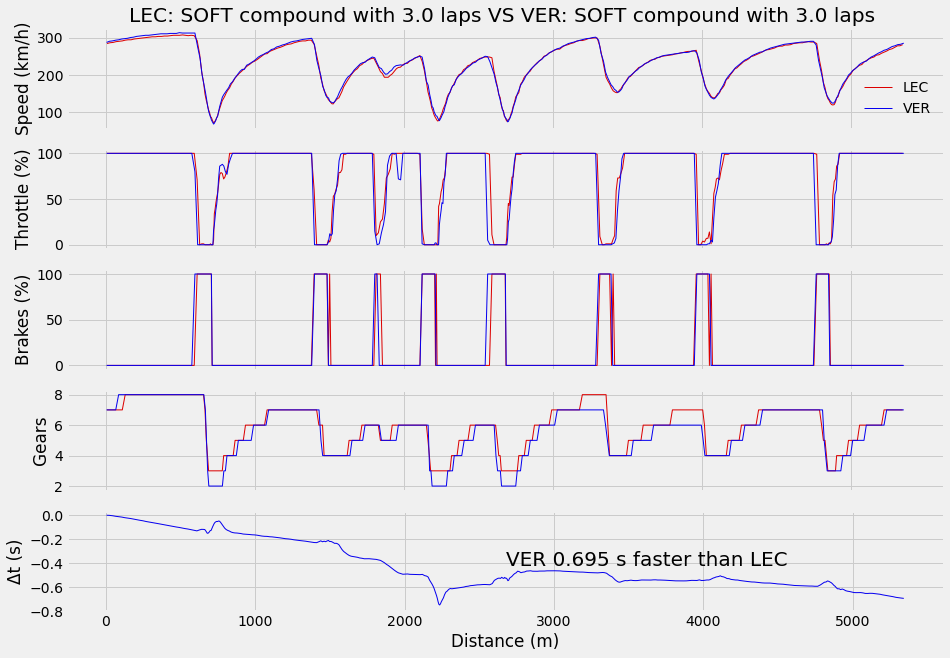

In [94]:
color1 = plotting.team_color(fastest_1['Team'])
color2 = plotting.team_color(fastest_2['Team'])

#plotting.setup_mpl()
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(5,figsize=(14, 10))
#fig.suptitle(f'{driver1} VS {driver2} lap comparison with soft tyres', fontsize=20)
ax[0].set_title(f'{fastest_1.Driver}: {fastest_1.Compound} compound with {fastest_1.TyreLife} laps VS {fastest_2.Driver}: {fastest_2.Compound} compound with {fastest_2.TyreLife} laps ')
ax[0].plot(telemetry_1['Distance'], telemetry_1['Speed'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[0].plot(telemetry_2['Distance'], telemetry_2['Speed'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[0].set(ylabel='Speed (km/h)')
#ax[0].set_facecolor('grey')
ax[0].legend(loc="lower right", facecolor='grey', frameon=False)
ax[1].plot(telemetry_1['Distance'], telemetry_1['Throttle'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[1].plot(telemetry_2['Distance'], telemetry_2['Throttle'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[1].set(ylabel='Throttle (%)')
#ax[1].set_facecolor('grey')
ax[2].plot(telemetry_1['Distance'], telemetry_1['Brake'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[2].plot(telemetry_2['Distance'], telemetry_2['Brake'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[2].set(ylabel='Brakes (%)')
#ax[2].set_facecolor('grey')
ax[3].plot(telemetry_1['Distance'], telemetry_1['nGear'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[3].plot(telemetry_2['Distance'], telemetry_2['nGear'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[3].yaxis.set_ticks(np.arange(2, 10, 2.0))
ax[3].set(ylabel='Gears')
#ax[3].set_facecolor('grey')
ax[4].plot(telemetry_1['Distance'], delta[0:len(telemetry_1)], color=np.where(delta > 0, color1, color2)[len(telemetry_1)], linewidth=1)
ax[4].text(telemetry_1['Distance'][200], delta.mean(), speed_text, fontsize = 20)
ax[4].set(ylabel=f'\u0394t (s)')
#ax[4].set_facecolor('grey')
ax[4].set(xlabel='Distance (m)')
ax[4].yaxis.set_ticks(np.arange(0, -1, -0.2))
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.savefig('telemetry.png', dpi=300)
plt.show()

In [95]:
# Get telemetry data
#x = fastest_1.telemetry.loc[fastest_1.telemetry.Source=='car'].X             # values for x-axis
#y = fastest_1.telemetry.loc[fastest_1.telemetry.Source=='car'].Y             # values for y-axis
x = fastest_1.telemetry['X']
y = fastest_1.telemetry['Y']
color = fastest_2.telemetry['Speed']-fastest_1.telemetry['Speed']    
#color = delta#laps_1.telemetry.nGear#      # value to base color gradient on
colormap = mpl.cm.coolwarm

In [96]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

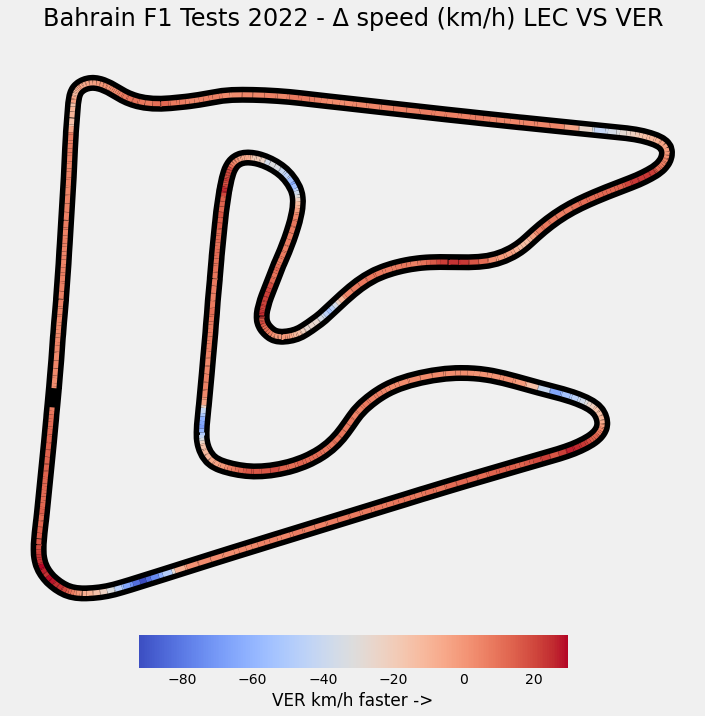

In [97]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 10))
fig.suptitle(f'{session.event.country} F1 Tests 2022 - \u0394 speed (km/h) {driver1} VS {driver2}', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal", 
                                   label=np.where(delta > 0, f'{driver1} km/h faster ->', f'{driver2} km/h faster ->')[len(telemetry_1)])

# Show the plot
plt.savefig('delta map.png', dpi=300)
plt.show()